# Project 3 - Supervised Machine Learning : Classification

Data source: https://archive.ics.uci.edu/dataset/2/adult

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette="pastel")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv('data/adult.data', names=columns)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data['income'] = pd.Series([x.strip() for x in data['income']])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [6]:
data['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [7]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [8]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [9]:
data['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

# Exploratory Data Analysis

In [10]:
data1 = data.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data1.workclass = le.fit_transform(data1.workclass)
data1['marital-status'] = le.fit_transform(data1['marital-status'])
data1['occupation'] = le.fit_transform(data1['occupation'])
data1['relationship'] = le.fit_transform(data1['relationship'])
data1['race'] = le.fit_transform(data1['race'])
data1['sex'] = le.fit_transform(data1['sex'])
data1['native-country'] = le.fit_transform(data1['native-country'])
data1['income'] = le.fit_transform(data1['income'])

data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,Bachelors,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,Assoc-acdm,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,HS-grad,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,HS-grad,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,HS-grad,9,4,1,3,4,1,0,0,20,39,0


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


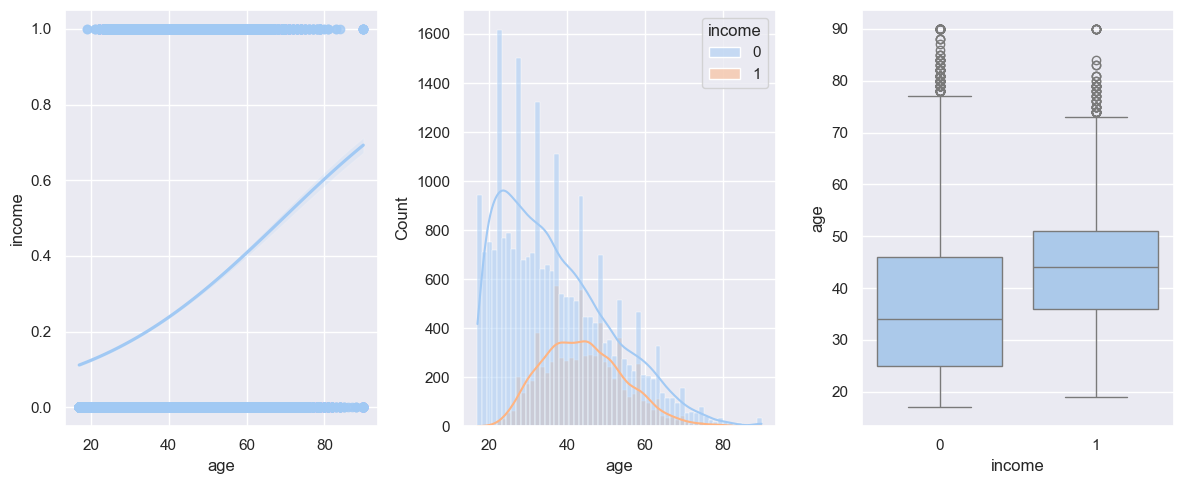

In [12]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['age'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='age', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='age', ax=axes[2])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


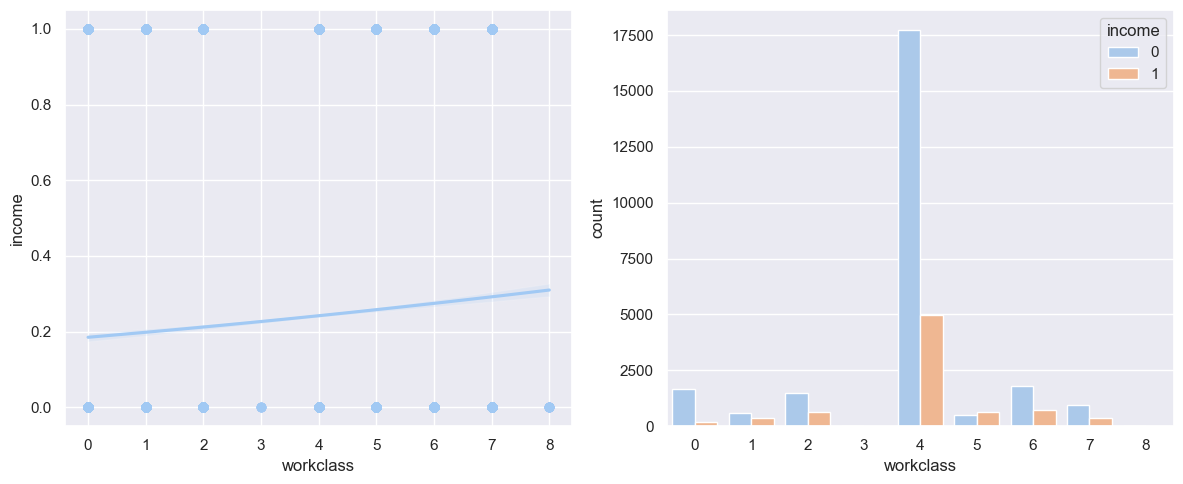

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['workclass'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='workclass', hue='income', ax= axes[1])

plt.tight_layout()

C:\Users\USER\AppData\Local\Temp\ipykernel_26360\757359738.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.regplot(y=data['income'].replace(['<=50K','>50K'], [0,1]),
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

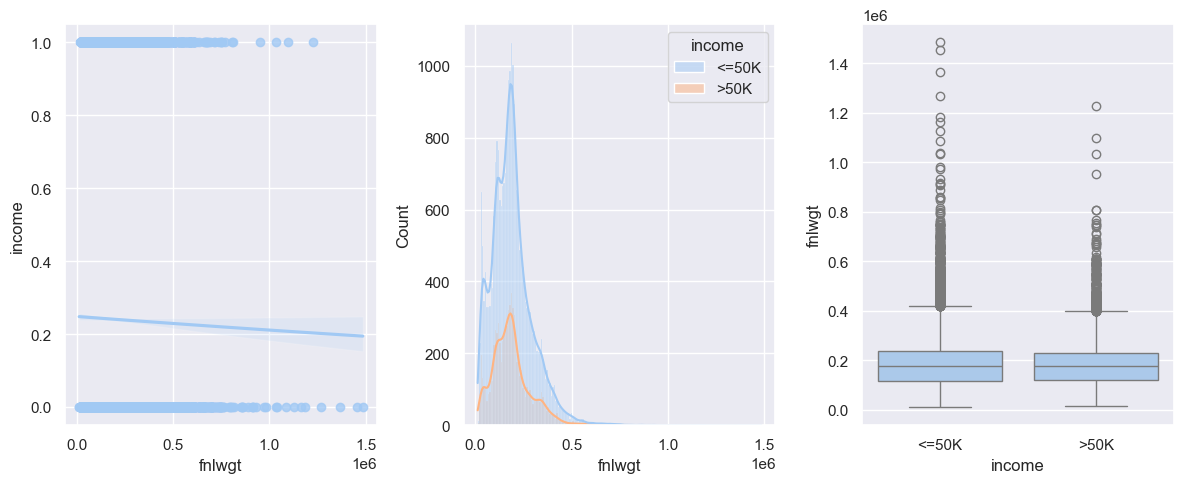

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data['income'].replace(['<=50K','>50K'], [0,1]),
            x=data['fnlwgt'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data, x='fnlwgt', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data, x='income', y='fnlwgt', ax=axes[2])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


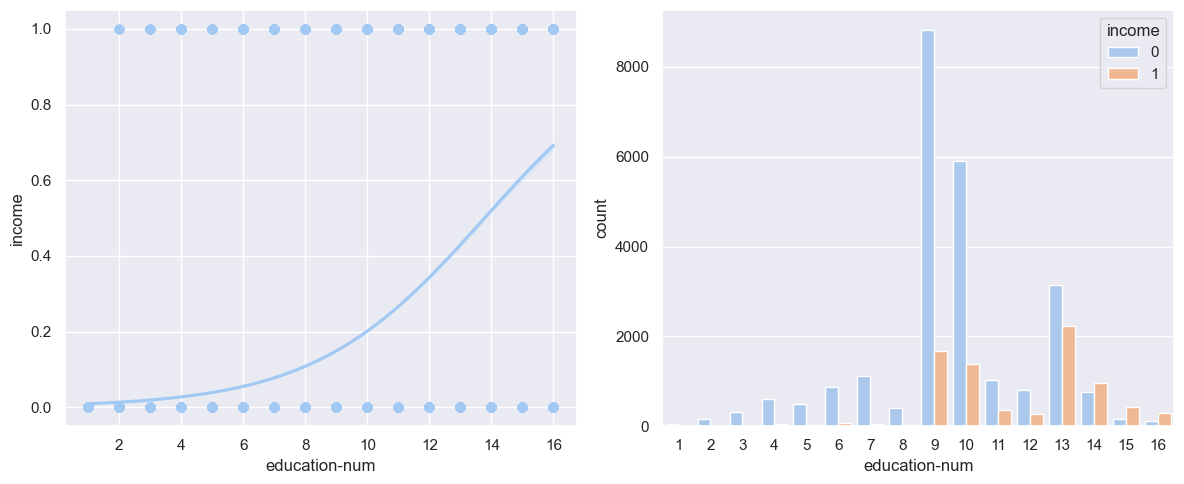

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['education-num'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='education-num', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


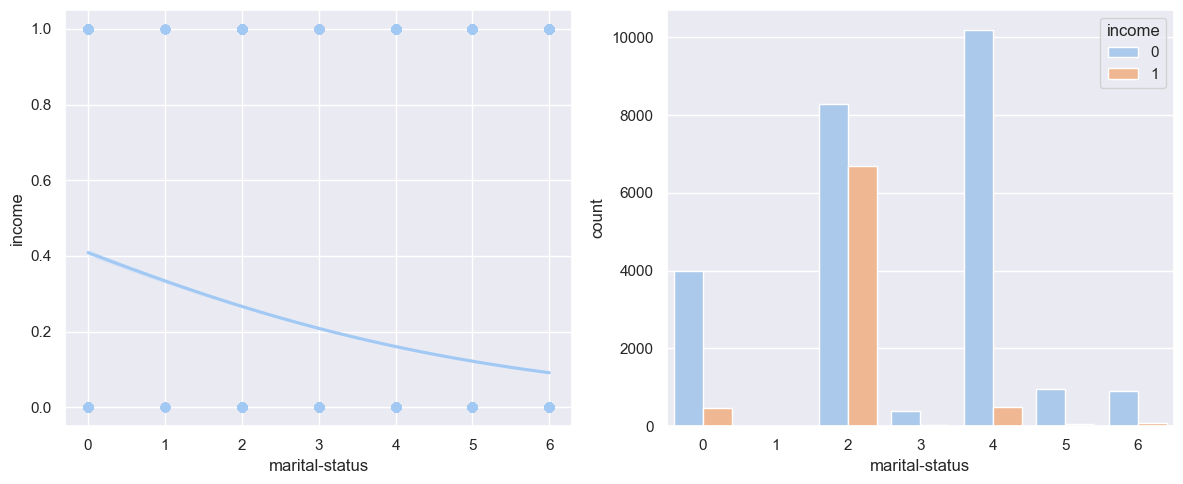

In [16]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['marital-status'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='marital-status', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


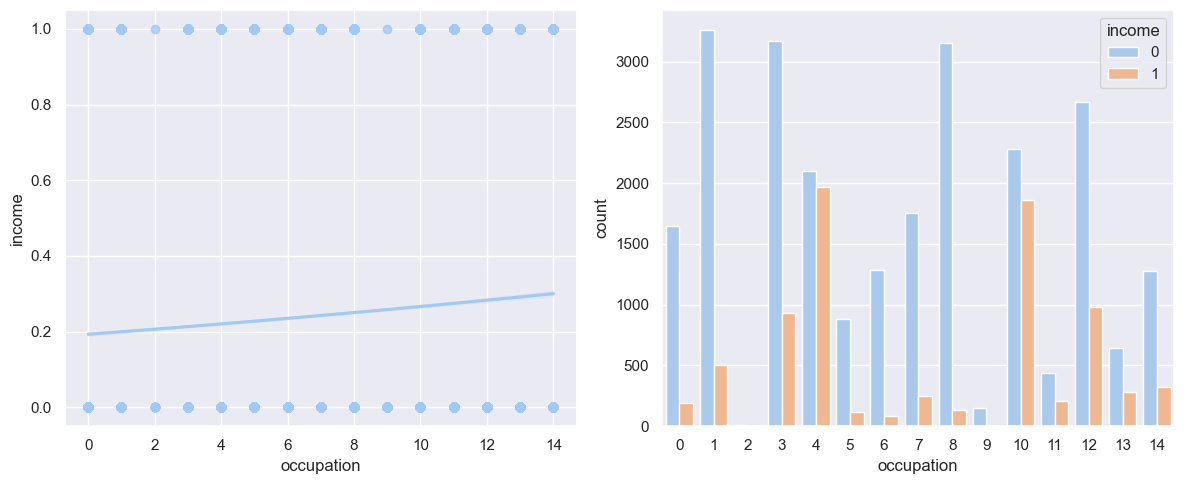

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['occupation'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='occupation', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


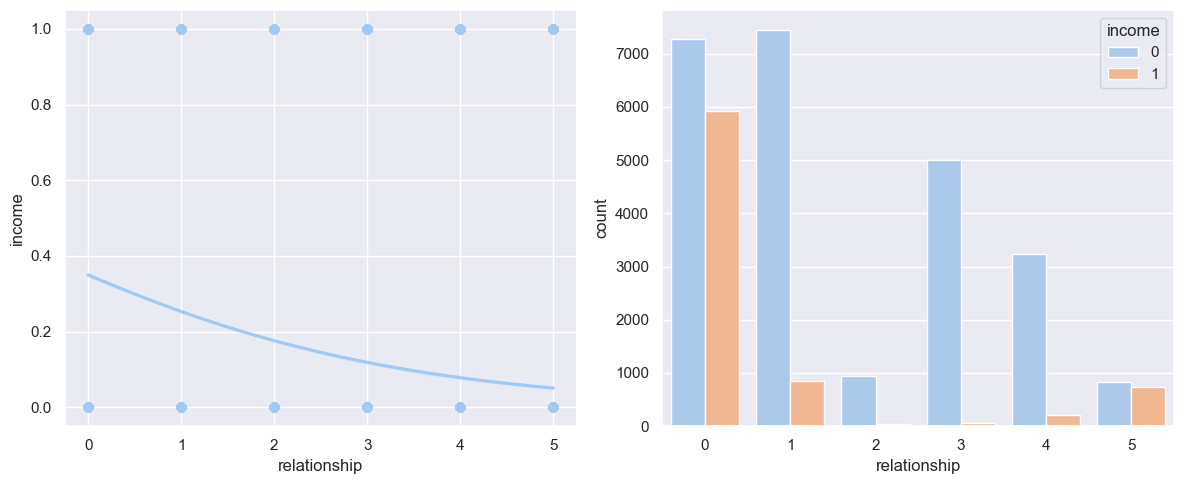

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['relationship'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='relationship', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


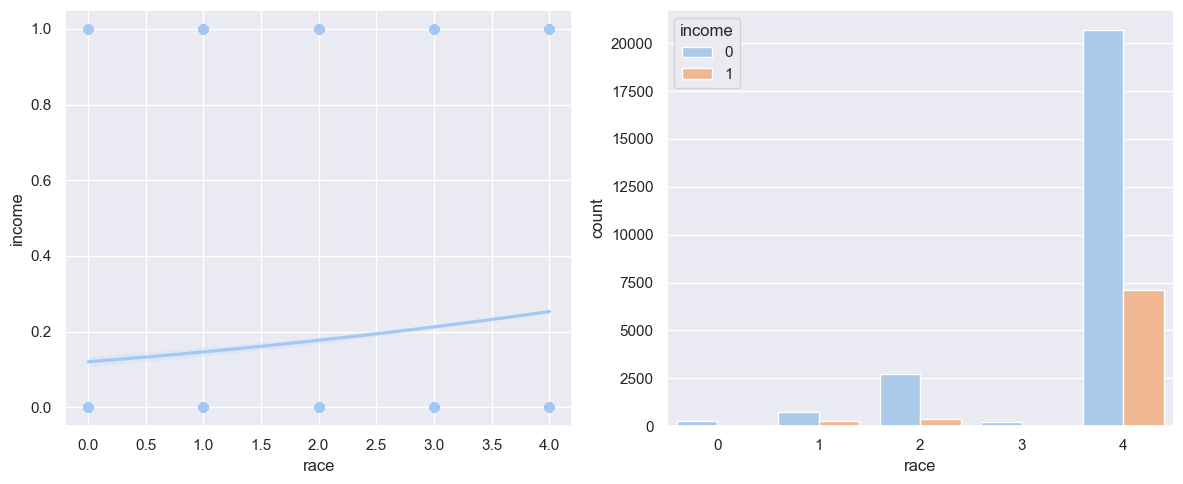

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['race'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='race', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


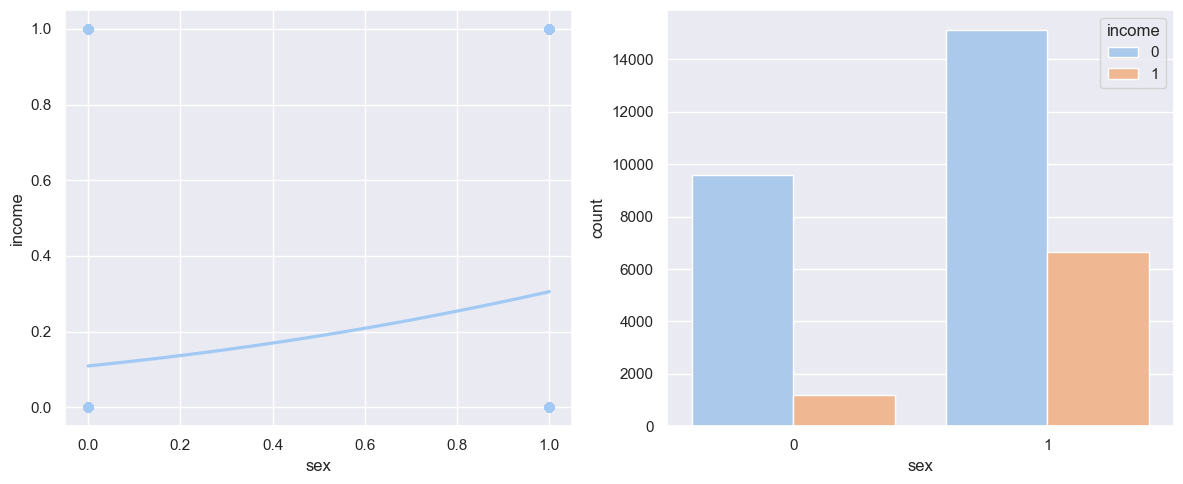

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['sex'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='sex', hue='income' ,ax=axes[1])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


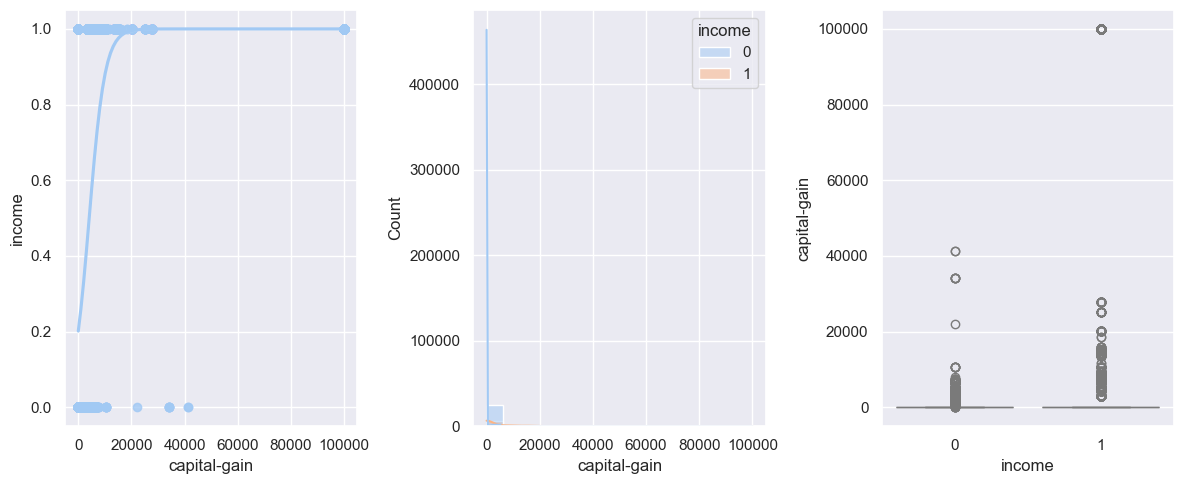

In [21]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['capital-gain'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='capital-gain', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='capital-gain', ax=axes[2])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


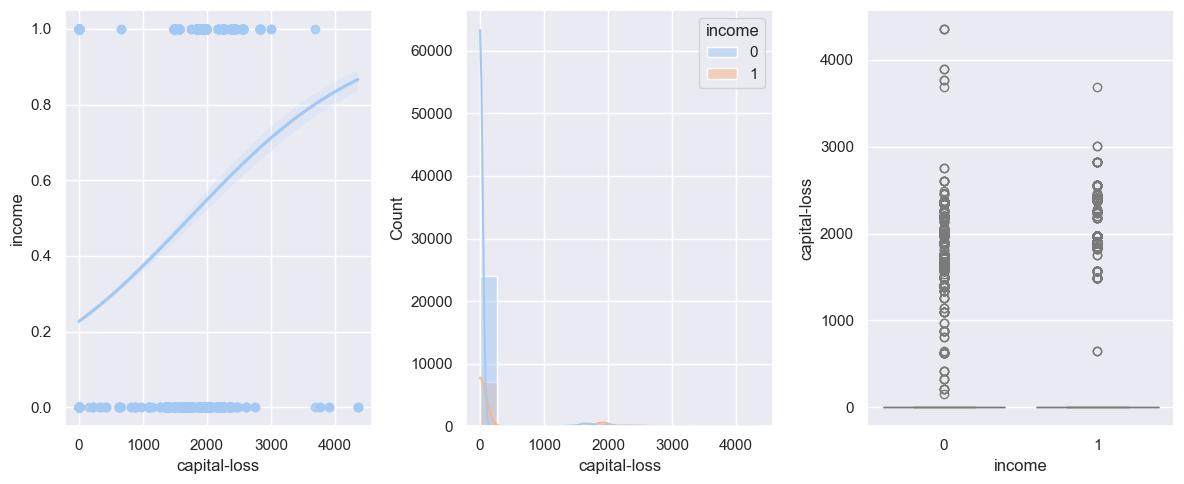

In [22]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['capital-loss'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='capital-loss', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='capital-loss', ax=axes[2])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


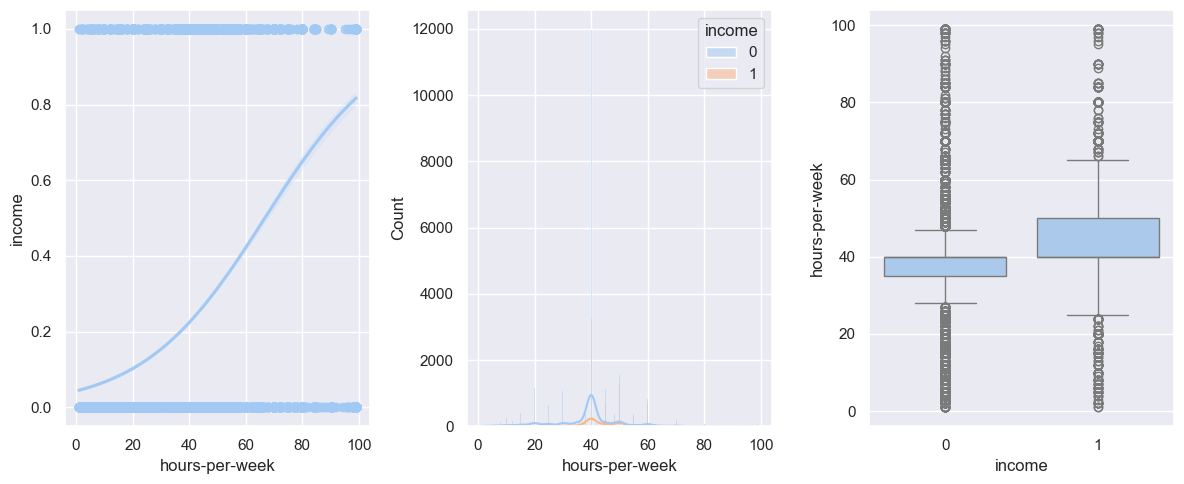

In [23]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['hours-per-week'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='hours-per-week', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='hours-per-week', ax=axes[2])

plt.tight_layout()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


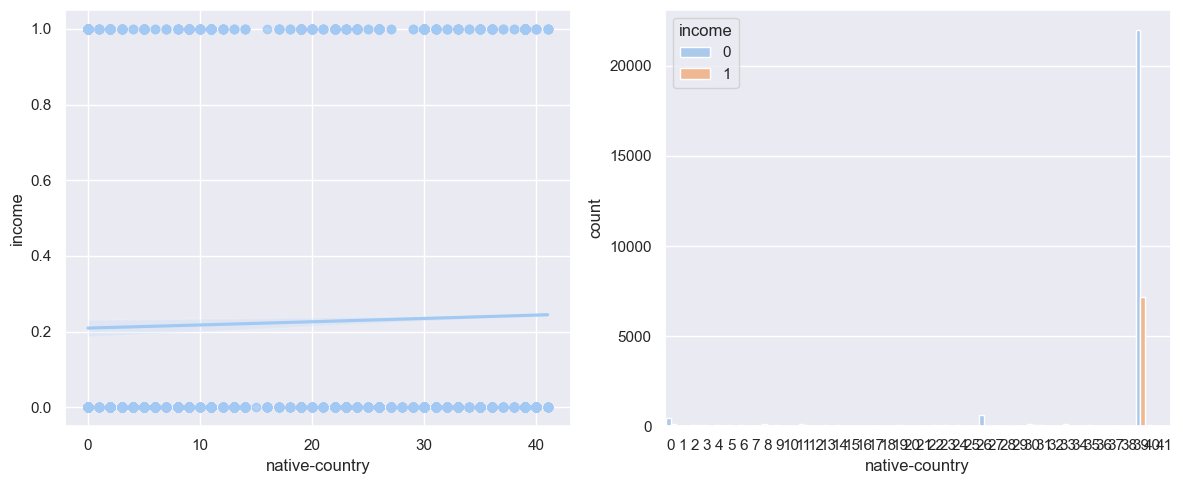

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['native-country'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='native-country', hue='income' ,ax=axes[1])

plt.tight_layout()

In [25]:
def remove_white_space(data):

    df = data.copy()

    for cols in df.columns:
        if df[cols].dtypes == 'object':
            df[cols] = [x.strip() for x in df[cols]]
        else:
            pass
        
    return df

In [48]:
data2 = remove_white_space(data)

for cols in data2.columns:
    print(np.unique(data2[cols]))

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
[  12285   13769   14878 ... 1366120 1455435 1484705]
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family

In [49]:
data2 = data2.replace('?', np.nan)
data2.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<Axes: >

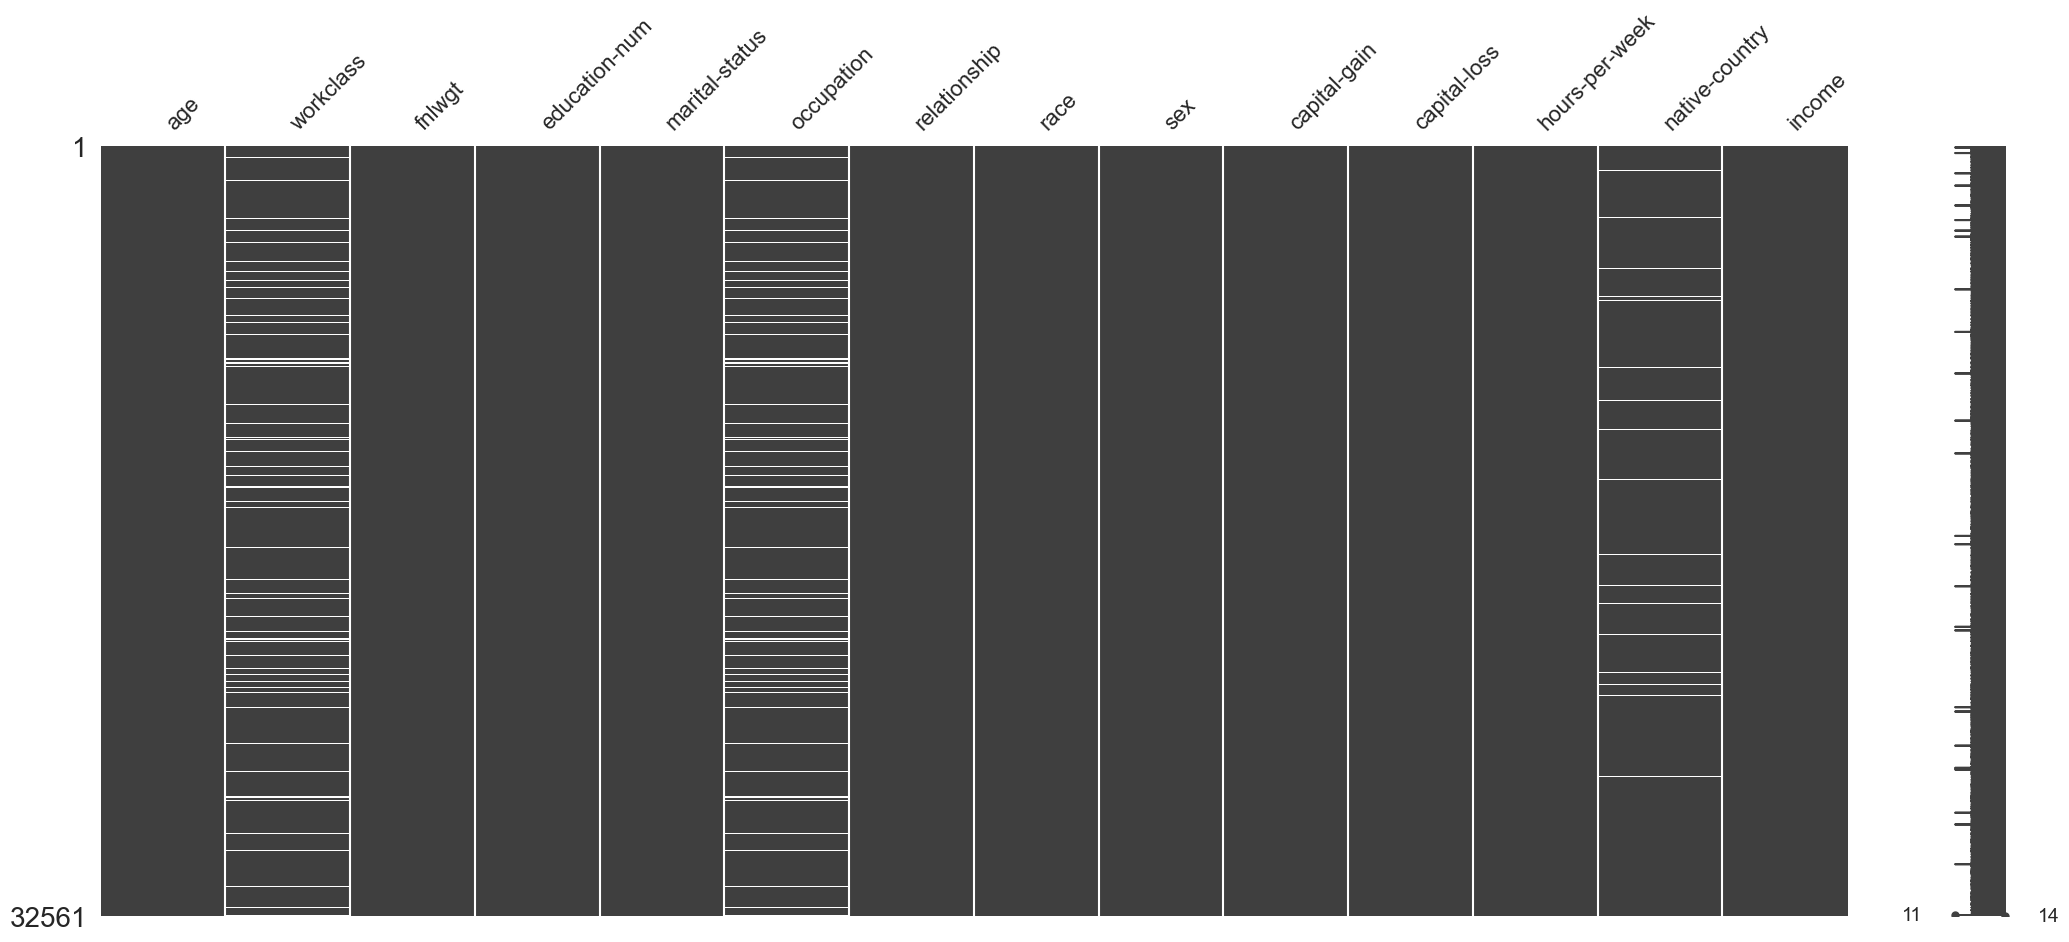

In [45]:
import missingno as msno
msno.matrix(data2)

# Feature Engineering

In [47]:
data2

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
data2 = data2.drop('education', axis=1)
data2

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [82]:
from sklearn.impute import KNNImputer

def impute_knn(data):

    imputer = KNNImputer(n_neighbors=1)
    le = LabelEncoder()
    df = data.copy()

    for cols in df.columns:
        if df[cols].dtypes == 'object':
            df[cols] = le.fit_transform(df[cols])
            df = df.where(~data.isna(), data)
        else:
            pass
    
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out())

    for cols in data.columns:
        if data[cols].dtypes == 'object':
            le.fit(data[cols])
            df_imputed[cols] = le.inverse_transform(df_imputed[cols].astype(int))
        else:
            pass

    return df_imputed

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_iterative(data):

    imputer = IterativeImputer(max_iter=10, random_state=42)
    le = LabelEncoder()
    df = data.copy()

    for cols in df.columns:
        if df[cols].dtypes == 'object':
            df[cols] = le.fit_transform(df[cols])
            df = df.where(~data.isna(), data)
        else:
            pass
    
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out())

    for cols in data.columns:
        if data[cols].dtypes == 'object':
            le.fit(data[cols])
            df_imputed[cols] = le.inverse_transform(df_imputed[cols].astype(int))
        else:
            pass

    return df_imputed

In [83]:
data_imputed = impute_knn(data2)
data_imputed['education-num'] = data_imputed['education-num'].astype(int)
data_imputed

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [66]:
data_imputed.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [84]:
cat_cols = ['workclass',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'native-country']

In [85]:
data[cat_cols]

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [86]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(data, cols):

    df = data[cols]

    ohc = OneHotEncoder(sparse_output=False)
    dummies = pd.DataFrame(
        ohc.fit_transform(df),
        columns = ohc.get_feature_names_out()
    )

    df_with_dummies = pd.concat(
        [data.drop(cols,axis=1), dummies],
        axis=1
    )

    return df_with_dummies

In [87]:
data_ohc = one_hot_encoding(data=data_imputed,cols=cat_cols)
data_ohc

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13,2174.0,0.0,40.0,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13,0.0,0.0,13.0,<=50K,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9,0.0,0.0,40.0,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7,0.0,0.0,40.0,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13,0.0,0.0,40.0,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['age'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='age', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='age', ax=axes[2])

plt.tight_layout()

# Modelling

In [88]:
X = data_ohc.drop('income',axis=1)
y = data_ohc['income'].replace(['<=50K','>50K'], [0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_26360\2938714219.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data_ohc['income'].replace(['<=50K','>50K'], [0,1])


In [89]:
from sklearn.model_selection import train_test_split

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

test = pd.read_csv('data/adult.test', names=columns)
test = test.drop(0)
test = remove_white_space(test)
test = impute_knn(test)
test = one_hot_encoding(test, cat_cols)

X_test = test.drop(['income','education'],axis=1)
y_test = test['income'].replace(['<=50K.','>50K.'], [0,1])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=.3, random_state=42
)

C:\Users\USER\AppData\Local\Temp\ipykernel_26360\3176005624.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = test['income'].replace(['<=50K.','>50K.'], [0,1])


In [77]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a ConfusionMatrixDisplay object
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    cm_display.plot(cmap='Blues')

    # Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks([0, 1])  # Set x-axis tick labels
    plt.yticks([0, 1])  # Set y-axis tick labels
    plt.show()

    # Calculate TPR, TNR, FPR, FNR
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    
    print("True Positive Rate (TPR):", TPR)
    print("True Negative Rate (TNR):", TNR)
    print("False Negative Rate (FNR):", FNR)
    print("False Positive Rate (FPR):", FPR)

In [78]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, roc_auc_score

def modelling(X_train, X_test, y_train, y_test):

    X_train = X_train.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace(',', ''))
    X_test = X_test.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace(',', ''))

    models = [
        LGBMClassifier(),
        XGBClassifier(),
        RandomForestClassifier(),
        CatBoostClassifier(silent= True),
        ExtraTreeClassifier()
        ]

    results = []
    for model in models:
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_prob = pd.DataFrame(model.predict_proba(X_test))
        
        # Evaluate the model's performance using various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        f1_w = f1_score(y_test, y_pred, average='weighted')
        rocauc = roc_auc_score(y_test, y_pred_prob[1])
        
        # Save the model's performance metrics in a dictionary
        result = {
            'Model': type(model).__name__,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_score': f1,
            'F1_score Weighted' : f1_w,
            'ROC AUC Score': rocauc
        }
        
        # Append the dictionary to the results list
        results.append(result)
        
    df_results = pd.DataFrame(results)

    return df_results.sort_values(ascending=False , by=['Accuracy','Precision'])

In [91]:
modelling(X_train, X_val, y_train, y_val)

[LightGBM] [Info] Number of positive: 5489, number of negative: 17303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 22792, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240830 -> initscore=-1.148134
[LightGBM] [Info] Start training from score -1.148134


,Model,Accuracy,Precision,Recall,F1_score,F1_score Weighted,ROC AUC Score
0,LGBMClassifier,0.875218,0.784816,0.663690,0.719189,0.871491,0.928752
1,XGBClassifier,0.872863,0.774209,0.666241,0.716179,0.869474,0.927647
3,CatBoostClassifier,0.872556,0.785162,0.647959,0.709993,0.868173,0.930476
2,RandomForestClassifier,0.856894,0.738978,0.627126,0.678473,0.852713,0.907556
4,ExtraTreeClassifier,0.800901,0.586854,0.584609,0.585729,0.800770,0.727049


In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(device = 'gpu')
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
accuracy_cv_lgb = cross_val_score(lgb, X_train,y_train, cv=kfold, scoring='accuracy')
accuracy_cv_lgb
print("CV Accuracy Score:", accuracy_cv_lgb)
print("Mean CV Accuracy Score:", accuracy_cv_lgb.mean())

[LightGBM] [Info] Number of positive: 3721, number of negative: 11473
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 15194, number of used features: 66
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1050 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.12 MB) transferred to GPU in 0.001656 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244899 -> initscore=-1.126004
[LightGBM] [Info] Start training from score -1.126004
[LightGBM] [Info] Number of positive: 3660, number of negative: 11535
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 15195, number of used features: 67
[LightGBM] [Info] Using GPU 

In [93]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='gpu_hist')
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
accuracy_cv = cross_val_score(xgb, X_train,y_train, cv=kfold, scoring='accuracy')
accuracy_cv

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:09] WARNING: C:\buildkite-agent\b

array([0.87299289, 0.86981703, 0.86915888])

In [94]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='gpu_hist')
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
accuracy_cv = cross_val_score(xgb, X_train,y_train, cv=kfold, scoring='precision')
accuracy_cv

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:15:39] WARNING: C:\buildkite-agent\b

array([0.76397107, 0.76315789, 0.77613776])